# Анализ IT-вакансий

## Цель проекта
Проанализировать рынок IT-вакансий, определить востребованные навыки и требования к опыту работы.

## Описание данных
Исходный Датасет содержит информацию о вакансиях в IT-сфере: название, город, опыт работы, размер зароботной платы, ключевые навыки и описание. Представлены данные сентября и октября 2023 года.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и первичный анализ данных

На данном этапе загружаем данные и оцениваем их структуру: количество строк и столбцов, типы данных и наличие пропусков.

In [2]:
vac = pd.read_csv('data/IT_vacancies.csv', encoding='utf-8-sig', parse_dates=['published_at'])

In [4]:
vac.head()

,id,area_id,area_name,name,test_required,salary_to,salary_from,salary_gross,salary_currency,address_lat,...,accept_temporary,accept_handicapped,professional_roles_id,professional_roles_name,working_time_modes,driver_license_types,working_time_intervals,quick_responses_allowed,response_letter_required,accept_incomplete_resumes
0,85146733,2,Санкт-Петербург,Тестировщик / QA Engineer (Junior / Middle / S...,NaN,NaN,NaN,NaN,NaN,59.984924,...,False,True,124,Тестировщик,NaN,NaN,NaN,False,False,False
1,87391606,1,Москва,Ведущий Системный Аналитик Kleiber.Graphics,NaN,250000.0,230000.0,False,RUR,NaN,...,False,False,148,Системный аналитик,NaN,NaN,NaN,False,False,False
2,85896506,79,Саратов,Бизнес-аналитик,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,10,Аналитик,NaN,NaN,NaN,False,False,False
3,86876446,72,Пермь,Менеджер проектов/Аккаунт-менеджер (IT сфера) ...,NaN,NaN,NaN,NaN,NaN,58.004460,...,False,False,107,Руководитель проектов,NaN,NaN,NaN,False,False,False
4,84560508,76,Ростов-на-Дону,"Специалист службы поддержки (удаленно), Ростов...",NaN,NaN,35000.0,True,RUR,NaN,...,False,False,121,Специалист технической поддержки,NaN,NaN,NaN,False,False,False


In [3]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68770 entries, 0 to 68769
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype                    
---  ------                     --------------  -----                    
 0   id                         68770 non-null  int64                    
 1   area_id                    68770 non-null  int64                    
 2   area_name                  68770 non-null  object                   
 3   name                       68770 non-null  object                   
 4   test_required              1916 non-null   object                   
 5   salary_to                  17548 non-null  float64                  
 6   salary_from                26782 non-null  float64                  
 7   salary_gross               30404 non-null  object                   
 8   salary_currency            30410 non-null  object                   
 9   address_lat                34853 non-null  float64                  
 10

В датасете присутствет большое количество пропущенных значения в колонках с зарплатой, а также с требуемыми навыками, что требует предварительной очистки данных.

## Очистка и подготовка данных

В первую очередь приводим названия нуждных нам Data профессий к единому виду.
Удаляем строки с остальными специальностями и оставляем только ключевые колонки. Тем самым приводим данные к удобному для анализа виду.

In [ ]:
# Создаем функцию для категоризации
def categorize_title(text):

    # Принимает название вакансии и возвращает категорию.

    if not isinstance(text, str):
        return 'other'

    text_lower = text.lower()

    # 1. Data Engineer
    de_patterns = ['data engineer', 'data engineering', 'инженер данных', 'дата инженер']
    if any(pattern in text_lower for pattern in de_patterns):
        return 'Data Engineer'

    # 2. Data Scientist
    ds_patterns = ['data scientist', 'data science', 'исследователь данных', 'дата сайентист']
    if any(pattern in text_lower for pattern in ds_patterns):
        return 'Data Scientist'

    # 3. ML Engineer
    ml_patterns = ['machine learning', 'ml engineer', 'машинн', 'mlops']
    if any(pattern in text_lower for pattern in ml_patterns):
        return 'ML Engineer'

    # 4. Data Analyst
    da_patterns = ['data analyst', 'аналитик данн', 'дата аналитик']
    # if 'business analyst' in text_lower and 'data' not in text_lower:
    #     return 'Business Analyst'

    if any(pattern in text_lower for pattern in da_patterns):
        return 'Data Analyst'

    # 5. Если не попали в основные категории
    return 'other'

vac['normalized_title'] = vac['name'].apply(categorize_title)

# Посмотрим на распределение
print(vac['normalized_title'].value_counts())

normalized_title
other             67538
Data Analyst        530
Data Scientist      311
Data Engineer       306
ML Engineer          85
Name: count, dtype: int64


In [ ]:
data_vac = vac[['area_name', 'normalized_title', 'experience', 'key_skills',
                'salary_from', 'salary_to', 'salary_currency', 'published_at',
                'schedule', 'employer_id']] \
           .query('normalized_title !="other"')

Для упрощения анализа сгруппируем опыт работы в категории:
- Junior
- Middle
- Senior

In [ ]:
data_vac.experience.value_counts()

,count
experience,
От 1 года до 3 лет,649
От 3 до 6 лет,468
Нет опыта,85
Более 6 лет,30


In [ ]:
def experience_to_grade(exp):
    if 'Нет опыта' in exp or 'менее 1 года' in exp:
        return 'Junior'
    elif 'От 1 года до 3 лет' in exp:
        return 'Middle'
    elif 'От 3 до 6 лет' in exp or 'Более 6 лет' in exp:
        return 'Senior'
    else:
        return 'Other'

data_vac['grade'] = data_vac['experience'].apply(experience_to_grade)

В результате каждому объявлению присвоен уровень специалиста, что позволяет сравнивать требования работодателей.

In [ ]:
data_vac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 29 to 68721
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype                    
---  ------            --------------  -----                    
 0   area_name         1232 non-null   object                   
 1   normalized_title  1232 non-null   object                   
 2   experience        1232 non-null   object                   
 3   key_skills        823 non-null    object                   
 4   salary_from       145 non-null    float64                  
 5   salary_to         130 non-null    float64                  
 6   salary_currency   196 non-null    object                   
 7   published_at      1232 non-null   datetime64[ns, UTC+03:00]
 8   schedule          1232 non-null   object                   
 9   employer_id       1232 non-null   float64                  
 10  grade             1232 non-null   object                   
dtypes: datetime64[ns, UTC+03:00](1), float64(3), o

Удаляем колонку с опытом, так как теперь у нас есть Грейд

In [ ]:
data_vac = data_vac.drop('experience', axis=1)

Конвертируем зарплату, указанную в иностранной валюте, в Росиийские рубли по курсу того времени

In [ ]:
data_vac.salary_currency.value_counts()

,count
salary_currency,
RUR,161
USD,27
KZT,5
EUR,1
UZS,1
KGS,1


In [ ]:
exchange_rates = {
    'USD': 97,
    'EUR': 103,
    'KZT': 0.2,
    'RUR': 1,
    'UZS': 0.008,
    'KGS': 1.086
}

data_vac['salary_from_RUB'] = data_vac.apply(
    lambda row: row['salary_from']*exchange_rates.get(row['salary_currency'], 1), axis=1
    )

data_vac['salary_to_RUB'] = data_vac.apply(
    lambda row: row['salary_to']*exchange_rates.get(row['salary_currency'], 1), axis=1
    )

Добавляем колонку со средним значением.
Eсли в одной из колонок значение отсутствует, то за среднее принимаем значение другой колонки.

In [ ]:
data_vac['avg_salary_RUB'] = data_vac[['salary_from_RUB', 'salary_to_RUB']].mean(axis=1)

Данные содержат дубликаты.
Некоторые вакансии дублируются полностью кроме времени публикации. Это значит что вакансию переопубликовывали.
У некоторых вакансий дублируются данные по всем колонкам кроме названия города и времени публикации. Обработаем дубликаты вакансий и оставим только последние по времени публикации.

In [ ]:
data_vac.shape

(1232, 13)

Удаляем полностью повторяющиеся вакансии, по умолчанию оставляя первую.

In [ ]:
data_vac= data_vac.drop_duplicates()

In [ ]:
data_vac.shape

(1232, 13)

Удалим строки, если у них одинаково все что перечисленно в subset и оставляем только последние публикации

In [ ]:
data_vac = data_vac.sort_values('published_at')

data_vac = data_vac.drop_duplicates(
    subset=[
        'employer_id',
        'normalized_title',
        'grade',
        'salary_from_RUB',
        'salary_to_RUB',
        'key_skills'
    ],
    keep='last'
)

In [ ]:
data_vac.shape

(996, 13)

In [ ]:
data_vac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 61342 to 65386
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype                    
---  ------            --------------  -----                    
 0   area_name         996 non-null    object                   
 1   normalized_title  996 non-null    object                   
 2   key_skills        732 non-null    object                   
 3   salary_from       135 non-null    float64                  
 4   salary_to         115 non-null    float64                  
 5   salary_currency   177 non-null    object                   
 6   published_at      996 non-null    datetime64[ns, UTC+03:00]
 7   schedule          996 non-null    object                   
 8   employer_id       996 non-null    float64                  
 9   grade             996 non-null    object                   
 10  salary_from_RUB   135 non-null    float64                  
 11  salary_to_RUB     115 non-null    float64   

Представим колонку key_skills в формате списков навыков

In [ ]:
def clean_skills(skill_string):
    if pd.isna(skill_string):
        return

    # Разделяем строку на отдельные навыки
    skills_list = [s.strip('.,[{:/}()"\'').strip().lower()
                   for s in skill_string.split(',')]

    # Заменяем сокращения
    cleaned_list = []
    for skill in skills_list:
        if skill == 'ml' or skill == 'машинное обучение':
            cleaned_list.append('machine learning')
        elif skill == 'dl':
            cleaned_list.append('deep learning')
        elif skill == 'nlp':
            cleaned_list.append('natural language processing')
        else:
            cleaned_list.append(skill)

    return cleaned_list

# Применяем функцию ко всей колонке
data_vac['key_skills'] = data_vac['key_skills'].apply(clean_skills)

## Переходим к анализу
1. Какие Data роли наиболее востребованны осенью 2023 года?

In [ ]:
distribution_roles = (data_vac['normalized_title'] \
                           .value_counts(normalize=True)*100) \
                           .reset_index() \
                           .rename(columns={'proportion': 'distribution_roles'}) \
                           .round(1)
distribution_roles

,normalized_title,distribution_roles
0,Data Analyst,46.9
1,Data Engineer,24.8
2,Data Scientist,20.6
3,ML Engineer,7.7


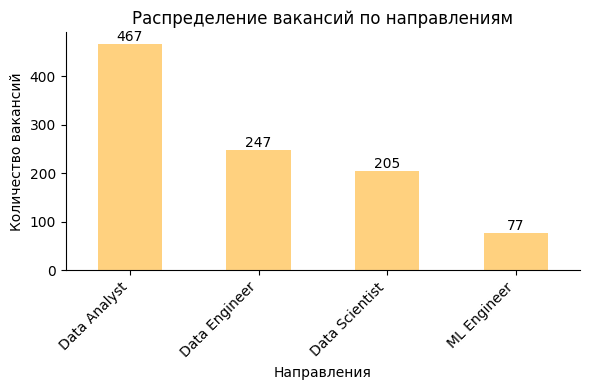

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
data_vac['normalized_title'].value_counts().plot(kind='bar', color='orange', alpha=0.5)
ax.bar_label(ax.containers[0])
plt.title('Распределение вакансий по направлениям')
plt.xlabel('Направления')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
sns.despine()
plt.show()


Большиство вакансий приходится на Data Analyst - 47%, в то время как на позицию ML Engineer всего лишь 8%

2. Какой процент Junior вакансий среди всех Data вакансий

In [ ]:
distribution_grade = (data_vac['grade'] \
                          .value_counts(normalize=True)*100) \
                          .reset_index() \
                          .rename(columns={'proportion': 'distribution_grade'}) \
                          .round(1)
distribution_grade

,grade,distribution_grade
0,Middle,53.4
1,Senior,42.2
2,Junior,4.4


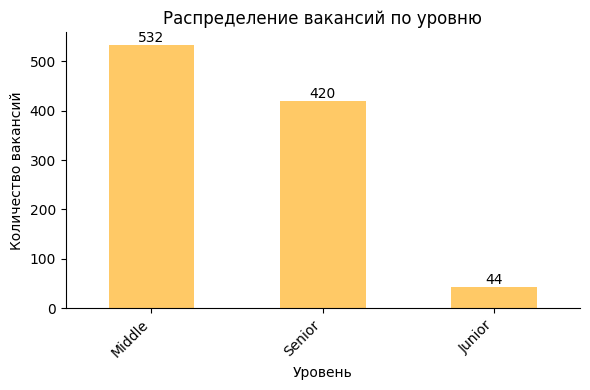

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
data_vac['grade'].value_counts().plot(kind='bar', color='orange', alpha=0.6)
ax.bar_label(ax.containers[0])
plt.title('Распределение вакансий по уровню')
plt.xlabel('Уровень')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
sns.despine()
plt.show()

Чуть больше половины работадателей ищет кандидатов уровня Middle - 53 %, Senior позиции составляют 42% от всех вакансий.
А вот Junior вакансий всего лишь 4.5%, что говорит нам о том что рынок ориентирован на опытных специалистов.

3. Какой процент вакансий в Москве и Санкт-Петербурге, а какой в остальных регионах России и стран СНГ

In [ ]:
total_cities = data_vac['area_name'].count()
distribution_MSC_SPB = data_vac.groupby('area_name').size() \
                              .div(total_cities) \
                              .mul(100) \
                              .round(1) \
                              .sort_values(ascending=False) \
                              .head(2)
distribution_MSC_SPB

,0
area_name,
Москва,70.1
Санкт-Петербург,7.6


In [ ]:
distribution_Region = 100 - sum(distribution_MSC_SPB)
round(distribution_Region, 1)

22.3

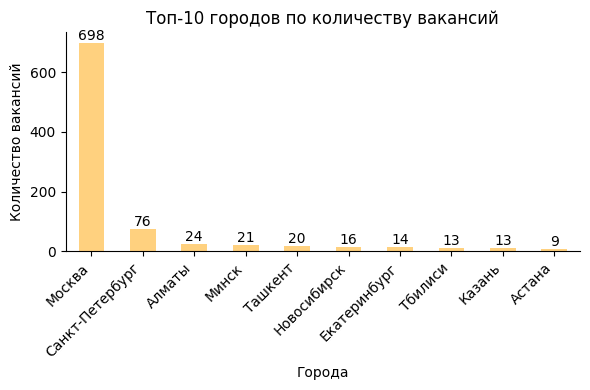

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
data_vac['area_name'].value_counts().head(10).plot(kind='bar', color='orange', alpha=0.5)
ax.bar_label(ax.containers[0])
plt.title('Топ-10 городов по количеству вакансий')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Города')
plt.ylabel('Количество вакансий')
plt.tight_layout()
sns.despine()
plt.show()

Основная концентрация IT-вакансий наблюдается в крупных городах.
На Москву приходится 70% вакансий, на Санкт-Петербург 8%, а на остальные регионы России и города СНГ 22%

4. Какой процент вакансий передлагает удаленную работу?

In [ ]:
distribution_schedule = (data_vac['schedule'].value_counts(normalize=True)*100) \
                                          .reset_index() \
                                          .rename(columns={'proportion': 'distribution_schedule'}) \
                                          .round(1)
distribution_schedule

,schedule,distribution_schedule
0,Полный день,73.6
1,Удаленная работа,22.4
2,Гибкий график,4.0


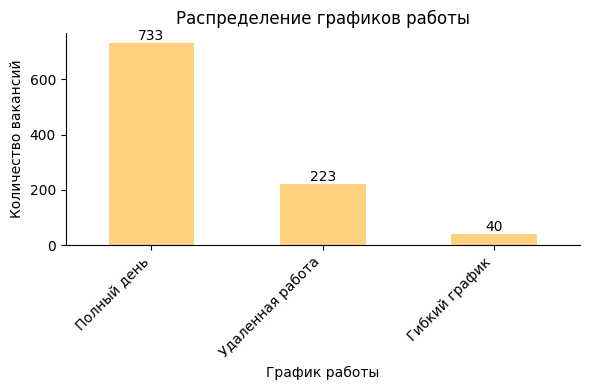

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
data_vac['schedule'].value_counts().plot(kind='bar', color='orange', alpha=0.5)
ax.bar_label(ax.containers[0])
plt.title('Распределение графиков работы')
plt.xticks(rotation=45, ha='right')
plt.xlabel('График работы')
plt.ylabel('Количество вакансий')
plt.tight_layout()
sns.despine()
plt.show()

В большинстве своем работадатель ищет специалистов на полный рабочий день в офисе - 74%. На удаленную работу 22%

5. Готовы ли работадатели брать Junior специалистов на удаленную работу?

In [ ]:
data_vac.query('grade=="Junior"').groupby(['schedule', 'grade'])['schedule']\
                          .count()\
                          .fillna(0) \
                          .round(0)

,,schedule
schedule,grade,
Гибкий график,Junior,3
Полный день,Junior,35
Удаленная работа,Junior,6


Большинство Junior вакансий направлены на полный рабочий день и только меньше 14% на удаленную работу.

6. Медианные зарплаты по специальностям и грейдам

In [ ]:
salary_stats = data_vac.groupby(['normalized_title', 'grade'])['avg_salary_RUB'] \
                      .agg(['count','median', 'mean']) \
                      .round(0) \
                      .fillna(0) \
                      .astype({'mean': 'int64', 'median': 'int64'})
salary_stats

count  median    mean
normalized_title grade                        
Data Analyst     Junior     14   60000   96946
                 Middle     64   98750  118430
                 Senior     23  200000  218520
Data Engineer    Junior      2  150000  150000
                 Middle     16  190000  188500
                 Senior     17  290000  317071
Data Scientist   Junior      2   49200   49200
                 Middle     10  150000  174500
                 Senior     10  292500  319050
ML Engineer      Junior      1   35000   35000
                 Middle     11   90000  178795
                 Senior      7  350000  348150

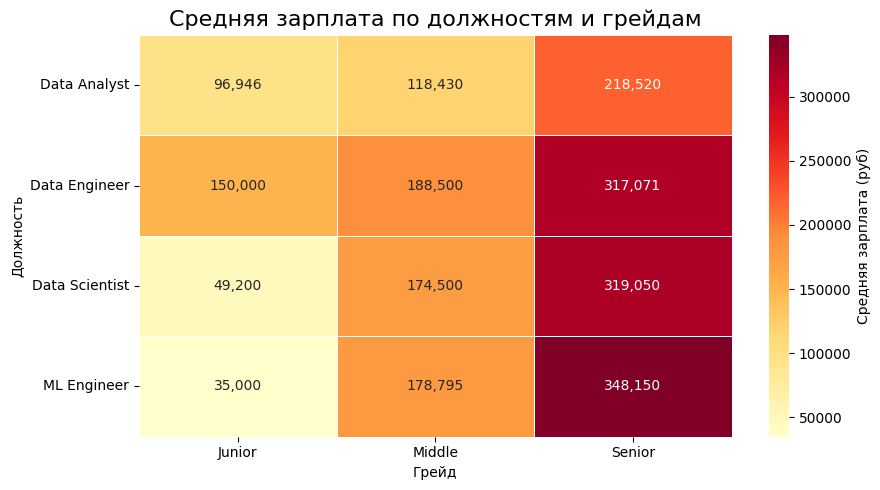

In [ ]:
heatmap_data = salary_stats['mean'].unstack()

plt.figure(figsize=(9, 5))
sns.heatmap(heatmap_data,
            annot=True,
            fmt=',d',
            cmap='YlOrRd',
            linewidths=0.5,
            cbar_kws={'label': 'Средняя зарплата (руб)'})

plt.title('Средняя зарплата по должностям и грейдам', fontsize=16)
plt.xlabel('Грейд')
plt.ylabel('Должность')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

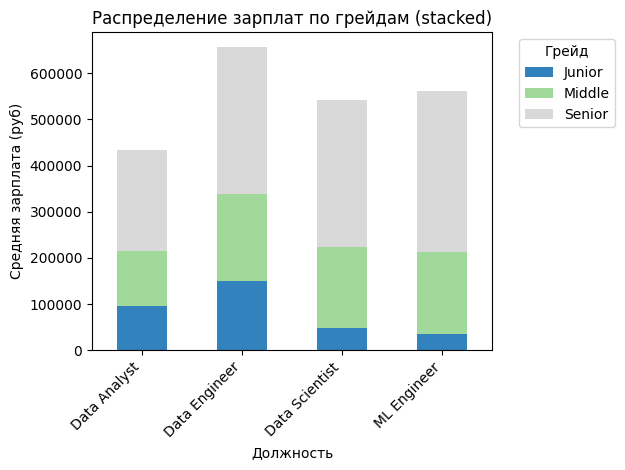

In [ ]:
stacked_data = salary_stats['mean'].unstack()

plt.figure(figsize=(10, 5))
stacked_data.plot(kind='bar', stacked=True, colormap='tab20c')
plt.title('Распределение зарплат по грейдам (stacked)', fontsize=12)
plt.xlabel('Должность')
plt.ylabel('Средняя зарплата (руб)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Грейд', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

По данным графика видно, что зарплаты позиций Middle и Senior Data Engineer, Data Scientist и ML Engineer находятся примерно на одном уровне.
А вот доход позиции Middle и Senior Data Analyst меньше примерно на 50% относительно других Data позиций на одинаковых грейдах.

7. Средняя зарплатная вилка по всем вакансиям

In [ ]:
data_vac['salary_range'] = data_vac['salary_to_RUB'] - data_vac['salary_from_RUB']
data_vac['range_percentage'] = (data_vac['salary_range']/data_vac['salary_to_RUB']).mul(100).round(0)

In [ ]:
data_vac['range_percentage'].mean().round(0)

np.float64(27.0)

Средняя вилка зарплат составляет 27%

8. Определим 5 самых востребованных навыков в Дата сфере

In [ ]:
all_skills_Data = data_vac.query('key_skills.notna()')

In [ ]:
all_skills_Data.shape

(732, 15)

In [ ]:
def top_skills(df, n, grade=None, n_t=None):

  if grade is None:
    df_filtered = df
  else:
    df_filtered = df[df['grade'] == grade]

  if n_t is None:
    df_filtered = df_filtered['key_skills']
  else:
    df_filtered = df_filtered[df_filtered['normalized_title'] == n_t]['key_skills']

  # Создаем рейтинг навыков сначала в один список
  all_skills=[]
  for skills in df_filtered:
    all_skills.extend(skills)

  # Далее в DataFrame
  a_s = pd.DataFrame(all_skills, columns=['skills'])
  a_s = a_s.groupby('skills').size().reset_index(name='count')
  a_s['proportion'] = ((a_s['count'])*100/
                                       (df_filtered.shape[0])).round(0)
  result = a_s.sort_values('count', ascending=False).head(n)
  return result

Топ 5 навыков всей Data сферы:

In [ ]:
all_skills =  top_skills(all_skills_Data, 5)
all_skills

,skills,count,proportion
403,sql,473,65.0
339,python,460,63.0
243,machine learning,158,22.0
467,анализ данных,155,21.0
143,etl,122,17.0


Топ 5 скилов Data сферы Middle грейда:

In [ ]:
skills_MD =  top_skills(all_skills_Data, 5, 'Middle')
skills_MD

,skills,count,proportion
266,sql,260,66.0
226,python,233,59.0
301,анализ данных,96,24.0
103,etl,65,16.0
162,machine learning,57,14.0


Топ 5 скилов Middle Data Analyst:

In [ ]:
skills_MDA =  top_skills(all_skills_Data, 5, 'Middle', 'Data Analyst')
skills_MDA

,skills,count,proportion
141,sql,156,72.0
121,python,91,42.0
165,анализ данных,83,38.0
181,аналитическое мышление,48,22.0
89,ms excel,47,22.0


Топ 5 скилов Middle Data Scientist:

In [ ]:
skills_MDS =  top_skills(all_skills_Data, 5, 'Middle', 'Data Scientist')
skills_MDS

,skills,count,proportion
69,python,51,88.0
44,machine learning,35,60.0
85,sql,35,60.0
70,pytorch,11,19.0
111,математическая статистика,9,16.0


Топ 5 скилов Senior Data Scientist:

In [ ]:
skills_MDE =  top_skills(all_skills_Data, 5, 'Middle', 'Data Engineer')
skills_MDE

,skills,count,proportion
92,python,78,77.0
104,sql,66,65.0
39,etl,48,48.0
102,spark,30,30.0
48,hadoop,29,29.0


9. Определим 10 самых часто встречающихся пар навыков

In [ ]:
from itertools import combinations
from collections import Counter

skills_lists = data_vac['key_skills'].dropna()

pair_counter = Counter()

for skills in skills_lists:
    # Генерируем все уникальные пары в одном списке
    unique_skills = list(set(skills))  # Убираем дубликаты
    for pair in combinations(sorted(unique_skills), 2):
      pair_counter[pair] += 1

# Топ-10 самых популярных пар
top_pairs = pd.DataFrame(pair_counter.most_common(10), columns=['pair_skills', 'count'])
top_pairs['pair_skills'] = top_pairs['pair_skills'].apply(lambda x: ', '.join(x))
top_pairs

,pair_skills,count
0,"python, sql",332
1,"sql, анализ данных",110
2,"machine learning, python",96
3,"etl, sql",94
4,"etl, python",80
5,"big data, python",78
6,"python, анализ данных",78
7,"hadoop, python",70
8,"power bi, sql",67
9,"python, spark",66


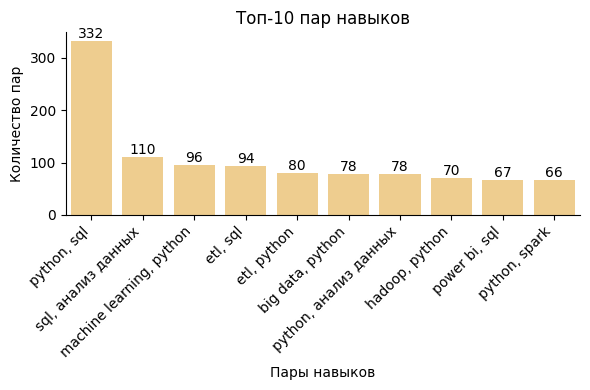

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=top_pairs, x='pair_skills', y='count', color='orange', alpha=0.5)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Пары навыков')
plt.ylabel('Количество пар')
ax.set_title('Топ-10 пар навыков')
plt.tight_layout()
sns.despine()

## Ограничения анализа

1. Анализ выполнен на основе данных одного источника, что может не полностью отражать рынок IT-вакансий.
2. В части вакансий отсутствует информация о ключевых навыках, что ограничивает полноту анализа требований работодателей.
3. Анализ уровня заработных плат проведён на основе ограниченного объёма данных, так как информация о зарплате указана не во всех вакансиях, что может влиять на точность выводов.
4. Данные охватывают период с 18 сентября 2023 года по 17 октября 2023 года, что не позволяет учитывать динамику рынка во времени.

## Выводы
1. Чуть меньше половины вакансий приходятся на роль Data Analyst (47%)
2. Junior специалиста работодатели расматривают на удаленный формат работы меньше чем в 14% вакансий
3. Data Engineer, Data Scientist и ML Engineer в среднем имеют дохов выше чем Data Analyst на 50% (На Middle и Senior грейдах)
4. Наиболее востребованные навыки среди всех Data-вакансий: Python, SQL, ML
5. Самые часто встречаемые пары навыков: Python+Sql, Sql+Анализ данных , ML+Python